In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [2]:
dfalgForest = pd.read_csv("Algerian_forest_fires_cleaned.csv",)
dfalgForest.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
dfalgForest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [5]:
dfalgForest.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [6]:
dfalgForest.duplicated().sum()

0

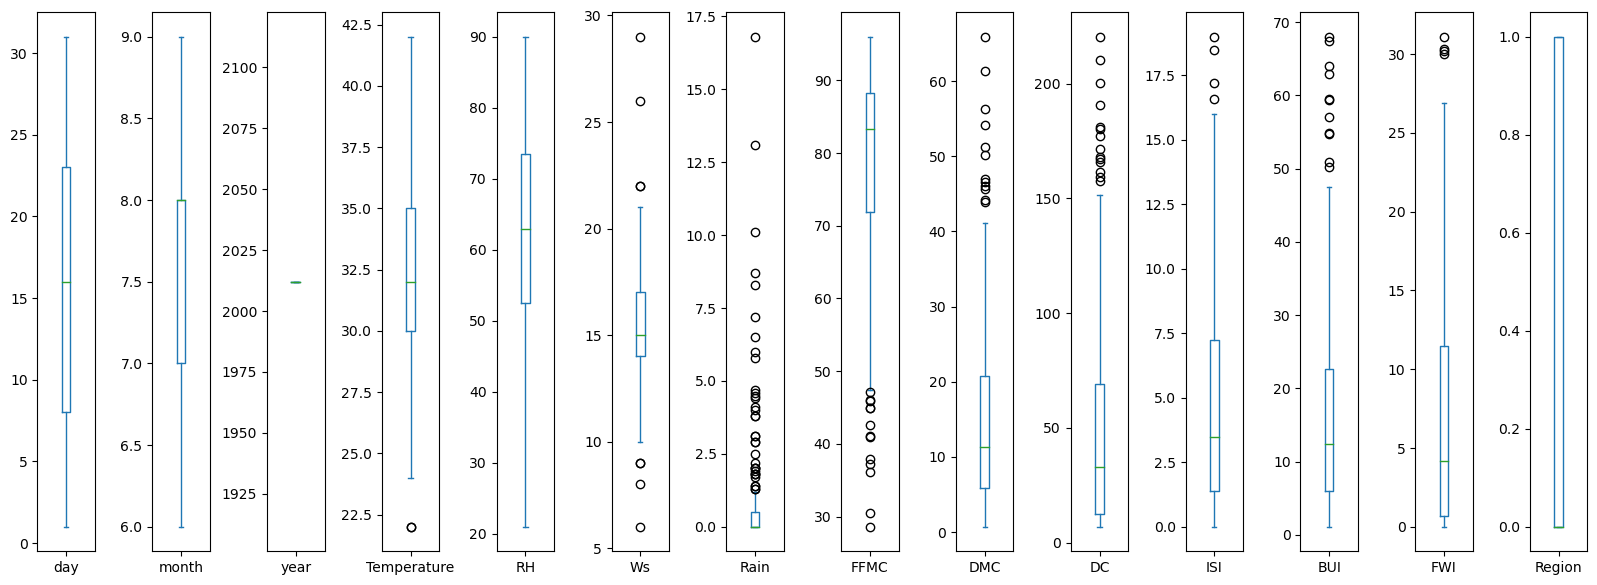

In [8]:
dfalgForest.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(20, 7)
)
plt.subplots_adjust(wspace=1) 
plt.show()

In [9]:
dfalgForest.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [10]:
for column in ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region']:
    Q1 = dfalgForest[column].quantile(0.25)
    Q3 = dfalgForest[column].quantile(0.75)
    IQR = Q3 - Q1
    lowerBound = Q1 - 1.5 * IQR
    upperBound = Q3 + 1.5 * IQR
    dfalgForest = dfalgForest[(dfalgForest[column] >= lowerBound) & (dfalgForest[column] <= upperBound)]

In [11]:
dfalgForest.shape

(155, 15)

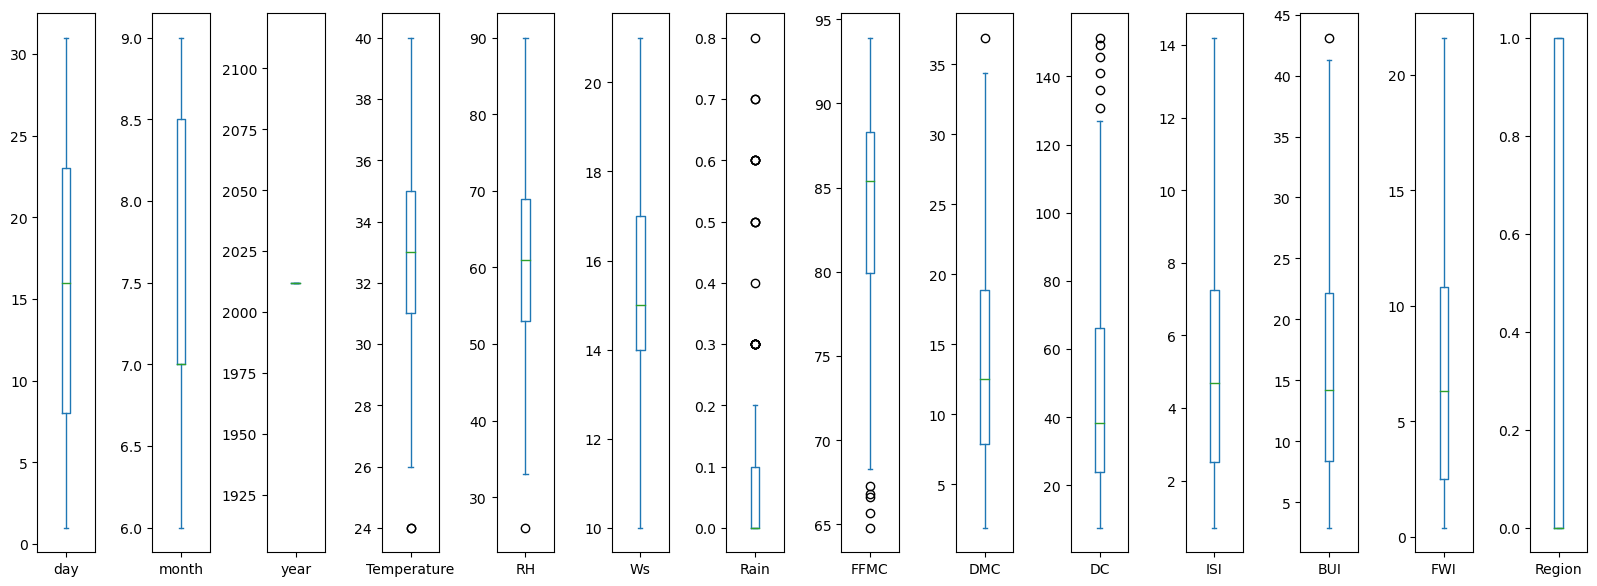

In [12]:
dfalgForest.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(20, 7)
)
plt.subplots_adjust(wspace=1) 
plt.show()

Non-numeric columns: Index(['Classes'], dtype='object')


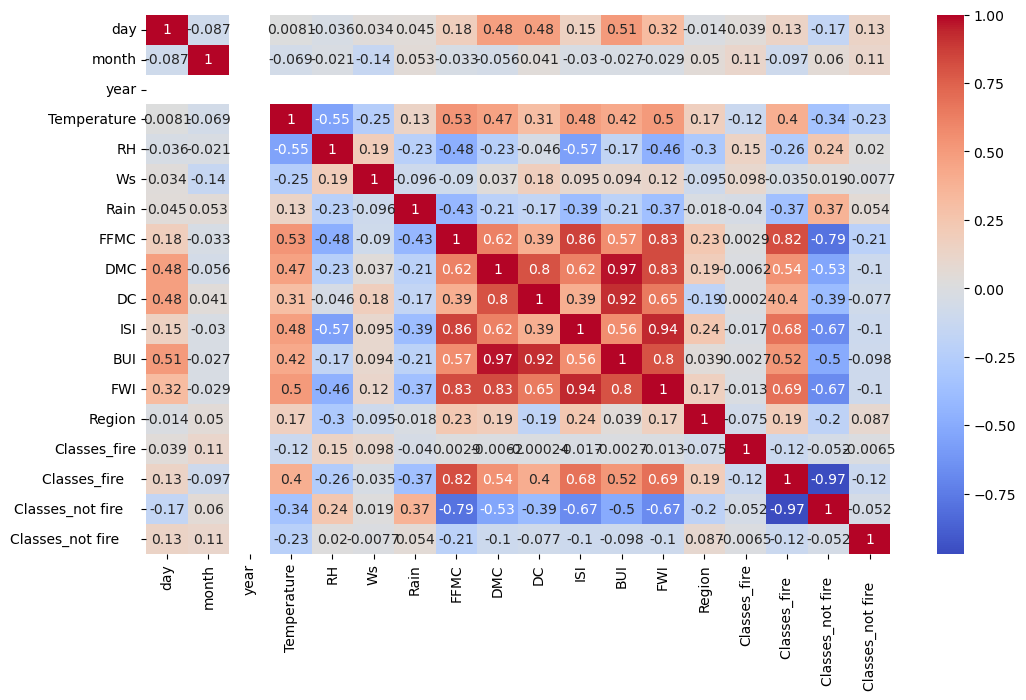

In [42]:
non_numeric_columns = dfalgForest.select_dtypes(exclude='number').columns
print("Non-numeric columns:", non_numeric_columns)
 
non_numeric_columns = dfalgForest.select_dtypes(exclude='number').columns

dfalgForest_encoded = pd.get_dummies(dfalgForest, columns=['Classes'])


corr_matrix = dfalgForest_encoded.corr()


plt.figure(figsize=(12, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()
 




In [22]:
X = dfalgForest[['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'Region']]
Y = dfalgForest['FWI']

In [23]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=42)

In [24]:
sr = StandardScaler()
trainXsc = sr.fit_transform(trainX)
testXsc = sr.transform(testX)

In [25]:
lrModel1 = LinearRegression()

In [26]:
lrModel1.fit(trainXsc, trainY)

LinearRegression()

In [27]:
lrModel1.coef_, lrModel1.intercept_

(array([ 7.66142189e-02,  1.03426229e-01,  1.11022302e-15,  9.70186426e-02,
        -4.35895603e-02,  4.04057221e-02, -1.74817394e-01, -3.05031870e-01,
        -6.03373627e-01, -6.78002795e-01,  3.96507877e+00,  3.43592820e+00,
        -1.45462523e-01]),
 7.499999999999999)

In [28]:
yPred = lrModel1.predict(testXsc)

In [29]:
mse = mean_squared_error(testY,yPred)
mae = mean_absolute_error(testY,yPred)
rsq = r2_score(testY,yPred)
print("LR Model 1 MSE : ", mse)
print("LR Model 1 MAE : ", mae)
print("LR Model 1 R2 : ", rsq)

LR Model 1 MSE :  0.23429979069021864
LR Model 1 MAE :  0.36472099024860344
LR Model 1 R2 :  0.9909192646893801


In [31]:
X = dfalgForest[['month', 'Temperature', 'RH', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI']]
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=42)
sr = StandardScaler()
trainXsc = sr.fit_transform(trainX)
testXsc = sr.transform(testX)

In [32]:
lrModel2 = LinearRegression()
lrModel2.fit(trainXsc, trainY)
lrModel2.coef_, lrModel2.intercept_

(array([ 0.06876483,  0.03428875,  0.09023618, -0.2512949 , -1.02488525,
        -0.70096689,  4.08661105,  3.88384949]),
 7.499999999999999)

In [33]:
yPred = lrModel2.predict(testXsc)
mse = mean_squared_error(testY,yPred)
mae = mean_absolute_error(testY,yPred)
rsq = r2_score(testY,yPred)
print("LR Model 2 MSE : ", mse)
print("LR Model 2 MAE : ", mae)
print("LR Model 2 R2 : ", rsq)

LR Model 2 MSE :  0.2259435802309247
LR Model 2 MAE :  0.3357103784720204
LR Model 2 R2 :  0.9912431255650435


In [34]:
import pickle
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(lrModel2, file)
with open('scaler_model.pkl', 'wb') as file:
    pickle.dump(sr, file)

In [35]:
with open('linear_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    
with open('scaler_model.pkl', 'rb') as file2:
    loaded_scaler = pickle.load(file2)

In [36]:
dataX = [[6,31,64,86.8,17.8,71.8,6.7,21.6],
[8,34,53,89,21.6,80.3,9.2,25.8],
[9,32,55,89.1,25.5,88.5,7.6,29.7],
[6,32,47,79.9,18.4,84.4,2.2,23.8],
[6,33,50,88.7,22.9,92.8,7.2,28.3],
[9,29,68,59.9,2.5,8.6,1.1,2.9],
[9,27,75,55.7,2.4,8.3,0.8,2.8],
[7,32,76,63.1,2.6,9.2,1.3,3],
]

dataY = [10.6,15,13.9,3.9,12.9,0.4,0.3,0.5]

In [37]:
scaledX = loaded_scaler.transform(dataX)

C:\Users\manik\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [38]:
yPred = loaded_model.predict(scaledX)
mse = mean_squared_error(dataY,yPred)
mae = mean_absolute_error(dataY,yPred)
rsq = r2_score(dataY,yPred)
print("Linear Model MSE : ", mse)
print("Linear Model MAE : ", mae)
print("Linear Model R2 : ", rsq)

Linear Model MSE :  0.4476545323586282
Linear Model MAE :  0.6184166820738595
Linear Model R2 :  0.9880389726122933


In [ ]:
#conclusion
After training Linear Regression Model 1,achieved an impressive R-squared score of 0.99, indicating that approximately 99% of the variance in the dependent variable can be explained by the independent variables. The model also exhibited a Mean Squared Error (MSE) of 0.23 and a Mean Absolute Error (MAE) of 0.38, representing the average squared and absolute differences between the predicted and actual values, respectively.

Following this, we refined the model by removing some columns based on insights gained from Model 1. This led to the development of Linear Regression Model 2, which also demonstrated a remarkable R-squared score of 0.99. The MSE and MAE for Model 2 were slightly improved, with values of 0.22 and 0.33, respectively.

To further enhance our predictive performance, we can explore different combinations of independent variables with high correlation and significant coefficient values. This iterative process aims to optimize the model's feature set to better capture the underlying relationships within the data, potentially leading to further improvements in predictive accuracy.
